In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print(df.shape)
df.isnull().sum()

(418, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
#Hanle Null Values

mean_age = df['Age'].mean()
mean_Fare = df['Fare'].mean()
df['Age'].fillna(mean_age, inplace=True)
df['Cabin'].fillna('No', inplace=True)
df['Fare'].fillna(mean_Fare, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No,S


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.drop('Name', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,No,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,No,S
2,894,0,2,male,62.0,0,0,240276,9.6875,No,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,No,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,No,S


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#Round the Age column to the nearest integer
df['Age'] = df['Age'].round().astype(int)

enc = OrdinalEncoder()

#Find uniqe values of Sex column and assign numerical values
df['Sex'].unique()
enc.fit_transform(df[['Sex']])
df[['Sex']] = enc.fit_transform(df[['Sex']])

#Find uniqe values of Ticket column and assign numerical values
df['Ticket'].unique()
enc.fit_transform(df[['Ticket']])
df[['Ticket']] = enc.fit_transform(df[['Ticket']])

#Find uniqe values of Cabin column and assign numerical values
df['Cabin'].unique()
enc.fit_transform(df[['Cabin']])
df[['Cabin']] = enc.fit_transform(df[['Cabin']])

#Find uniqe values of Embarked column and assign numerical values
df['Embarked'].unique()
enc.fit_transform(df[['Embarked']])
df[['Embarked']] = enc.fit_transform(df[['Embarked']])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,1.0,34,0,0,152.0,7.8292,76.0,1.0
1,893,1,3,0.0,47,1,0,221.0,7.0000,76.0,2.0
2,894,0,2,1.0,62,0,0,73.0,9.6875,76.0,1.0
3,895,0,3,1.0,27,0,0,147.0,8.6625,76.0,2.0
4,896,1,3,0.0,22,1,1,138.0,12.2875,76.0,2.0


In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex            float64
Age              int32
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

x = df[features]
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model =  LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
pd.DataFrame(data={'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
360,0,0
170,0,0
224,1,1
358,0,0
309,1,1
...,...,...
81,0,0
107,0,0
366,0,0
414,1,1


In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 1.0


# Random Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [24]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

x = df[features]
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test) 
pd.DataFrame(data={'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
360,0,0
170,0,0
224,1,1
358,0,0
309,1,1
...,...,...
81,0,0
107,0,0
366,0,0
414,1,1


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 1.0


In [26]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

#Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cnf_matrix 

array([[71,  0],
       [ 0, 55]], dtype=int64)

Text(0.5, 257.44, 'Predicted label\n')

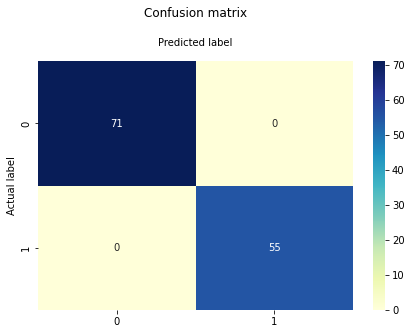

In [27]:
#Visualizing Confusion Matrix using Heatmap
class_names=[0,1]  
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix\n') 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label\n')